# Emotion Detection with Tensorflow, VGG architecture

In [1]:
#importing libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

2024-06-08 22:25:11.591215: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-08 22:25:11.617747: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-08 22:25:12.021520: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Dataset

https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset

In [2]:
picture_size = 48
folder_path = "../data/images/"

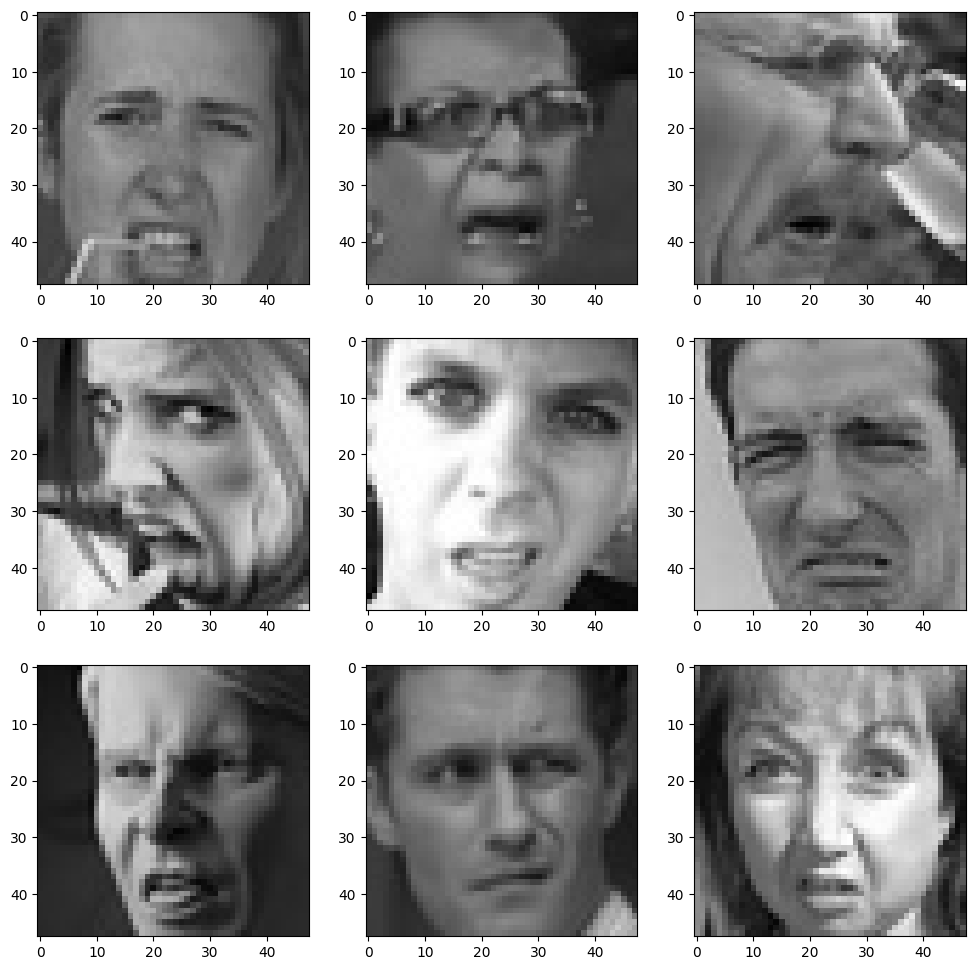

In [3]:
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

# Creating Training and Validation Data

In [4]:
batch_size  = 64

datagen_train  = ImageDataGenerator(rescale=1.0/255.0)
datagen_val = ImageDataGenerator(rescale=1.0/255.0)

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Model Architecture and Training

trying out VGG type of architecture

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation

# Define the input shape
input_shape = (48, 48, 1)  # For grayscale images, use (48, 48, 1)

# Initialize the model
model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), padding='same', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Block 2
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Block 3
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Block 4
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Flatten the layers
model.add(Flatten())

# Fully connected layer 1
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Fully connected layer 2
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

# Output layer
num_classes = 7  # Adjust this based on your dataset
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 48, 48, 64)        0

2024-06-08 22:26:03.675903: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-08 22:26:03.699172: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-08 22:26:03.699393: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [6]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=10,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=5,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 100

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

/home/thor_01/miniconda3/envs/tf/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [7]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/100


/tmp/ipykernel_74113/3853974908.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,
2024-06-08 22:26:15.269618: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-06-08 22:26:15.806563: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-06-08 22:26:15.909687: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2024-06-08 22:26:16.244633: I tensorflow/compiler/xla/stre

133/450 [=======>......................] - ETA: 4s - loss: 2.0210 - accuracy: 0.2152

2024-06-08 22:26:18.915298: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.18GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


449/450 [============================>.] - ETA: 0s - loss: 1.7987 - accuracy: 0.2937

2024-06-08 22:26:23.567324: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


450/450 [==============================] - 9s 17ms/step - loss: 1.7983 - accuracy: 0.2939 - val_loss: 1.7201 - val_accuracy: 0.3152 - lr: 0.0010
Epoch 2/100
450/450 [==============================] - 7s 15ms/step - loss: 1.3791 - accuracy: 0.4726 - val_loss: 1.4455 - val_accuracy: 0.4700 - lr: 0.0010
Epoch 3/100
450/450 [==============================] - 7s 15ms/step - loss: 1.2405 - accuracy: 0.5280 - val_loss: 1.1829 - val_accuracy: 0.5494 - lr: 0.0010
Epoch 4/100
450/450 [==============================] - 7s 15ms/step - loss: 1.1619 - accuracy: 0.5612 - val_loss: 1.1729 - val_accuracy: 0.5641 - lr: 0.0010
Epoch 5/100
450/450 [==============================] - 7s 15ms/step - loss: 1.1072 - accuracy: 0.5803 - val_loss: 1.1094 - val_accuracy: 0.5849 - lr: 0.0010
Epoch 6/100
450/450 [==============================] - 7s 15ms/step - loss: 1.0569 - accuracy: 0.6015 - val_loss: 1.2275 - val_accuracy: 0.5628 - lr: 0.0010
Epoch 7/100
450/450 [==============================] - 7s 15ms/step - 

Plotting Accuracy & Loss

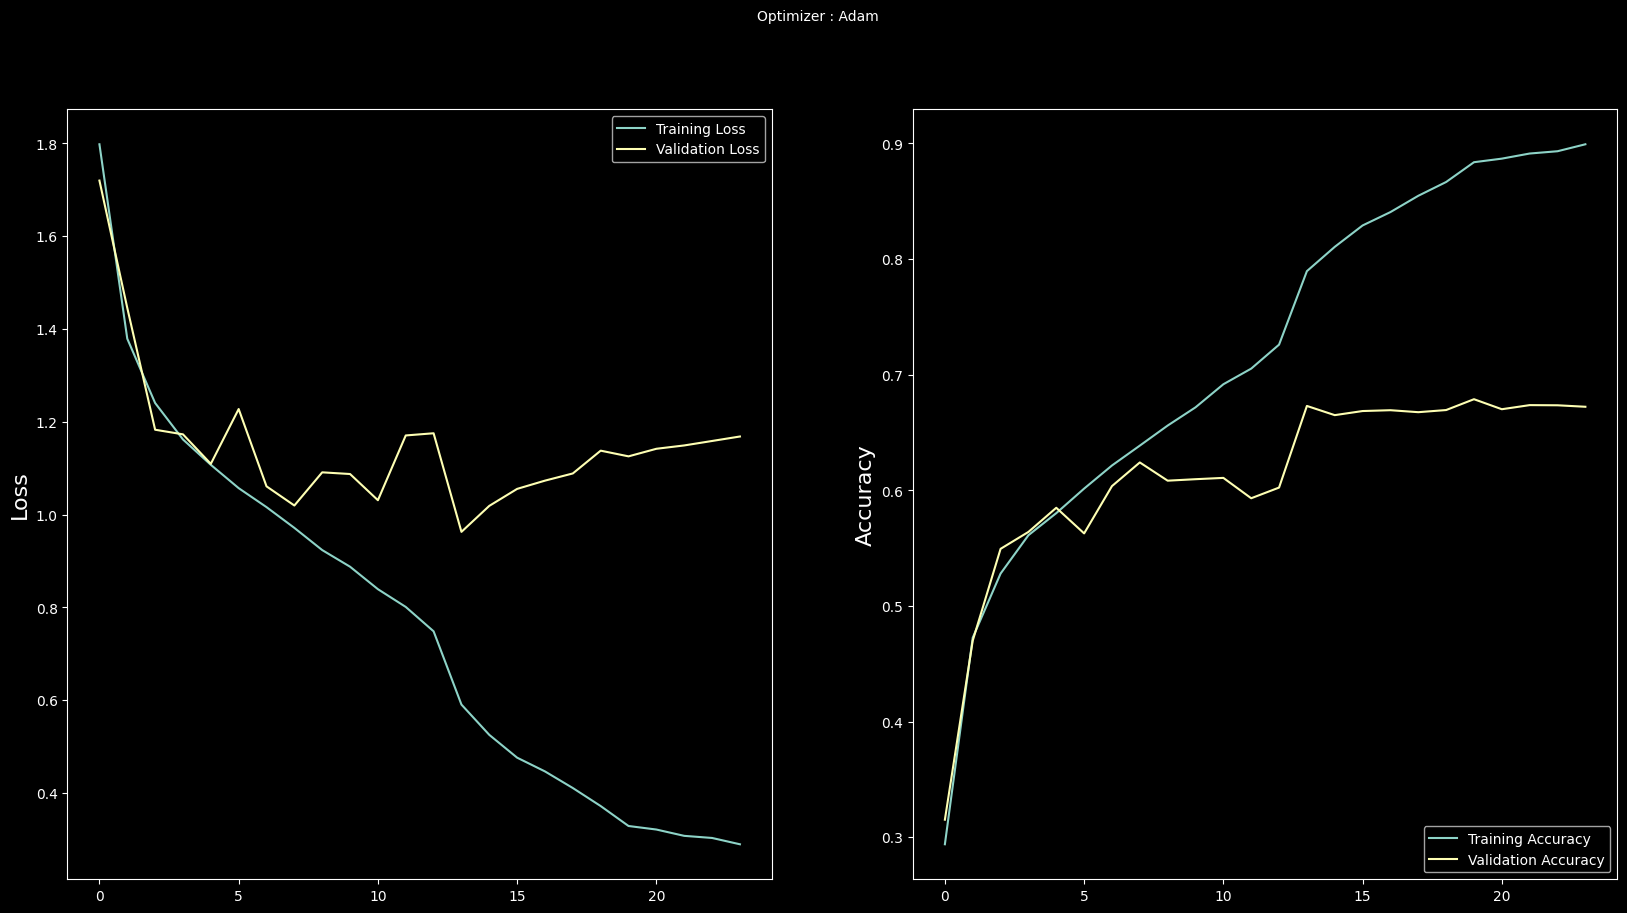

In [8]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [9]:
model.save('emotions_VGG_v2.h5')

# Inference Eamples

In [10]:
import cv2
import tensorflow as tf

# Define the mapping dictionary
categories = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}

# Load the pre-trained model
model = tf.keras.models.load_model('/home/thor_01/Documents/EC/tensorflow/transfer-learning-emotions/trainined_models/emotions_VGG_v2.h5') # put your trained model here!

def detect_faces_and_classify(image_path, model, categories):
    # Load the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Load the Haar Cascade classifier for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    for (x, y, w, h) in faces:
        # Crop the face
        face = gray[y:y+h, x:x+w]
        # Resize the face to 48x48
        face_resized = cv2.resize(face, (48, 48))
        # Normalize the face
        face_resized = face_resized / 255.0
        # Add channel and batch dimensions
        face_resized = np.expand_dims(face_resized, axis=-1)
        face_resized = np.expand_dims(face_resized, axis=0)
        
        # Predict the class
        prediction = model.predict(face_resized)
        class_idx = np.argmax(prediction)
        label = categories[class_idx]
        
        # Draw rectangle around the face
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
        # Put label text above the rectangle
        cv2.putText(image, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    
    # Convert the image from BGR (OpenCV format) to RGB (Matplotlib format)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image using Matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide the axis
    plt.show()

1/1 [==============================] - 0s 9ms/step


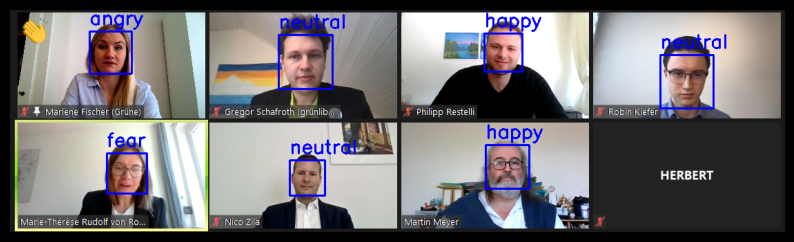

In [11]:
# Example usage
image_path = '/home/thor_01/Documents/EC/tensorflow/transfer-learning-emotions/test_images/BBZ-1123x0-c-default.png'
detect_faces_and_classify(image_path, model, categories)

1/1 [==============================] - 0s 10ms/step


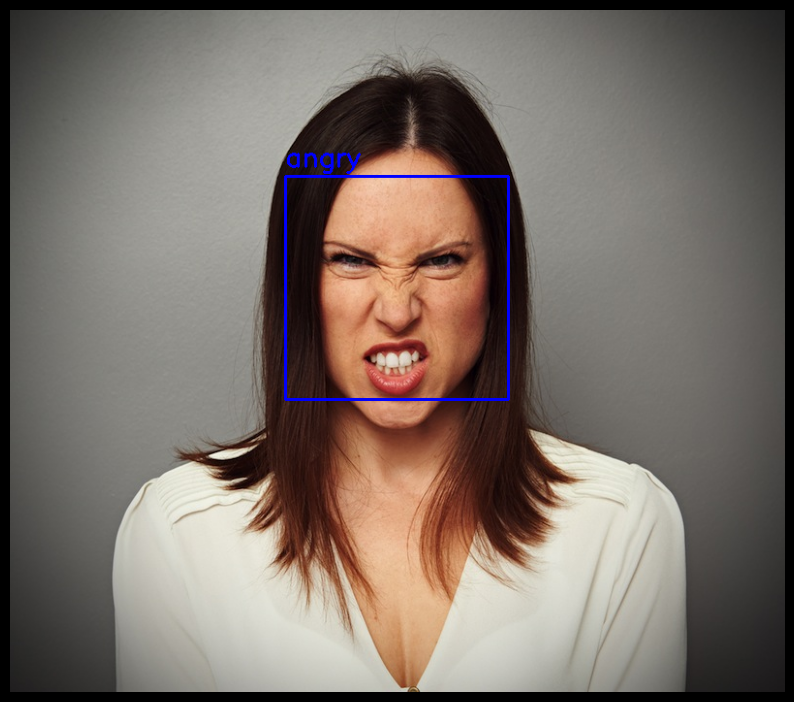

In [12]:
# Example usage
image_path = '/home/thor_01/Documents/EC/tensorflow/transfer-learning-emotions/test_images/DMUbjq2UjJcG3umGv3Qjjd.jpeg'
detect_faces_and_classify(image_path, model, categories)

1/1 [==============================] - 0s 10ms/step


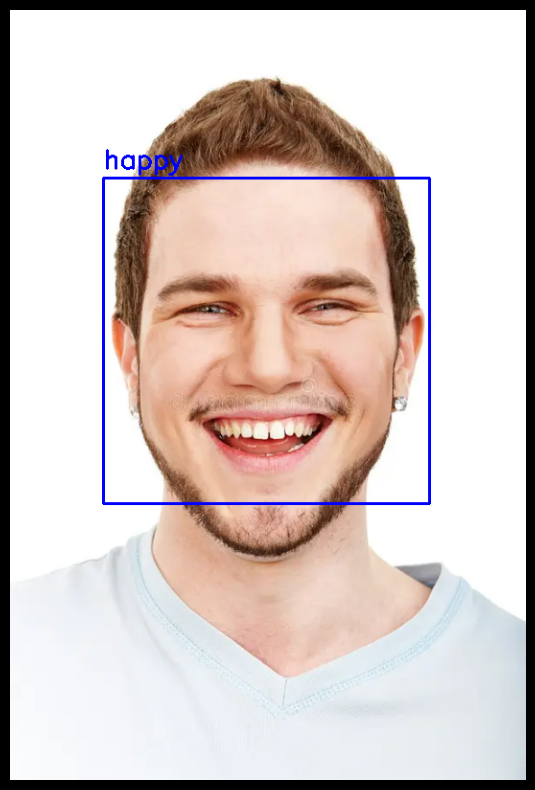

In [13]:
# Example usage
image_path = '/home/thor_01/Documents/EC/tensorflow/transfer-learning-emotions/test_images/happy4.png'
detect_faces_and_classify(image_path, model, categories)